<h1>
<font>Watermarking</font>
</h1>

In [49]:
import random
from PIL import Image, ImageDraw, ImageFont
import cv2 as cv
import numpy as np

<h2>
<font>Opening image & creating new text layer</font>
</h2>

In [84]:
img = Image.open('farzan.jpg').convert("RGBA") # Open image
txt = Image.new('RGBA', img.size, (255,255,255,0)) # Create a blank image

<h2>
<font>Diplay the original image</font>
</h2>

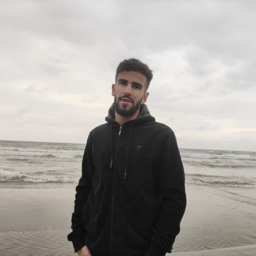

In [85]:
original = Image.open('farzan.jpg') # Open image
original = original.resize((256,256)) # Resize image
original

<h2>
<font>Creating text</font>
</h2>

In [86]:
text = "Security_of_Computer_Systems" # Text to be added
font = ImageFont.truetype("arial.ttf", 27) # Font style and size

<h2>
<font>Creating draw object</font>
</h2>

In [87]:
draw = ImageDraw.Draw(txt)

<h2>
<font>Positioning of text</font>
</h2>

In [88]:
width, height = img.size # Get image size

<h2>
<font>Loop for multiple watermarks</font>
</h2>

In [89]:
y = 200 # starting position of the text
for i in range(5):
    x=random.randint(0, width-500) # 500 is for the width of the text
    y+=random.randrange(0,int(height/8), 19)+random.randint(0,85) # 85 is for the height of the text
    draw.text((x,y), text, fill=(255,255,255, 75), font=font) # Add text to image

<h2>
<font>Combining both layers and saving new image</font>
</h2>

In [90]:
watermarked = Image.alpha_composite(img, txt) # Combine the two images together with transparency
watermarked.save('watermarked.png') # Save the image

<h2>
<font>Diplay the watermarked image</font>
</h2>

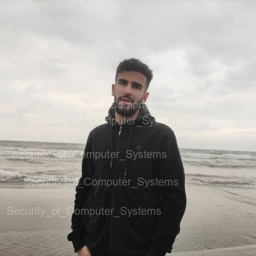

In [91]:
watermarked = Image.open('watermarked.png') # Open image
watermarked = watermarked.resize((256,256)) # Resize image
watermarked

<h2>
<font>Opening watermarked image</font>
</h2>

In [92]:
img = cv.imread('watermarked.png') # Open image

<h2>
<font>Rotate the image</font>
</h2>

In [93]:
rotated = cv.rotate(img, cv.ROTATE_90_CLOCKWISE) # Rotate image
cv.imwrite('rotated.png', rotated) # Save image

True

<h2>
<font>Diplay the rotated image</font>
</h2>

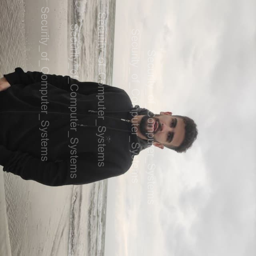

In [94]:
rotated = Image.open('rotated.png') # Open image
rotated = rotated.resize((256,256)) # Resize image
rotated

<h2>
<font>Resize the image</font>
</h2>

In [95]:
resized = cv.resize(img, (1280, 800)) # Resize image
cv.imwrite('resized.png', resized) # Save image

True

<h2>
<font>Diplay the resized image</font>
</h2>

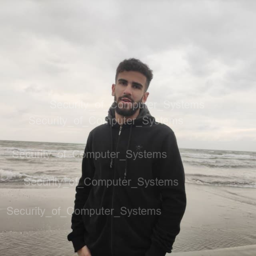

In [96]:
resized = Image.open('resized.png')
resized = resized.resize((256,256))
resized

<h2>
<font>Crop the image</font>
</h2>

In [98]:
img.shape # Get image shape

(640, 640, 3)

In [99]:
cropped = img[70:580, 20:530] # Crop image
cv.imwrite('cropped.png', cropped)

True

<h2>
<font>Diplay the cropped image</font>
</h2>

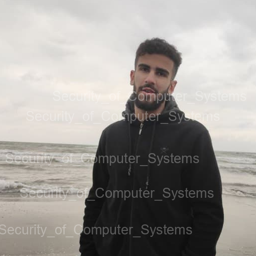

In [101]:
cropped = Image.open('cropped.png')
cropped = cropped.resize((256,256))
cropped

<h2>
<font>Add noise to the image</font>
</h2>

In [102]:
gauss_noise = np.zeros((640, 640),dtype=np.uint8) # Create a matrix of zeros
cv.randn(gauss_noise, 128, 20) # Add Gaussian noise to the matrix 
gauss_noise=(gauss_noise * 0.5).astype(np.uint8) # Scale the noise
imgGray = cv.imread('watermarked.png', 0) # Open image in grayscale
gn_img = cv.add(imgGray, gauss_noise) # Add noise to the image
cv.imwrite('noisy.png', gn_img) # Save image

True

<h2>
<font>Diplay the noisy image</font>
</h2>

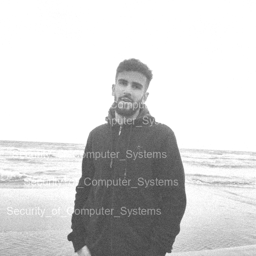

In [103]:
noisy = Image.open('noisy.png')
noisy = noisy.resize((256,256))
noisy